<a href="https://colab.research.google.com/github/anniezhang2288/python_notebooks/blob/main/pytorch_project_handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torch torchvision matplotlib


In [ ]:
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

In [ ]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

100%|██████████| 9912422/9912422 [00:00<00:00, 111676805.59it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 19106576.31it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 30375355.86it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4765014.70it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [ ]:
train_data.data.size()

torch.Size([60000, 28, 28])

In [ ]:
train_data.targets.size()

torch.Size([60000])

In [ ]:
train_data.targets


tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
from torch.utils.data import DataLoader

loaders = {
    'train': DataLoader(train_data,
                        batch_size = 100,
                        shuffle = True,
                        num_workers = 1),
    'test': DataLoader(test_data,
                        batch_size = 100,
                        shuffle = True,
                        num_workers = 1),
}

In [ ]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7e896fd61c60>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7e896fd61000>}

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x),2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
    # flatten data for linear layer, call view func
    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training = self.training)
    x = self.fc2(x)

    return F.softmax(x)


In [ ]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(loaders['train']):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
      print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders['train'].dataset)} ({100. * batch_idx / len(loaders['train']):.0f}%)]\tLoss: {loss.item():.6f}")
def test():
  model.eval()

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, target in loaders['test']:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += loss_fn(output, target).item()
      pred = output.argmax(dim = 1, keepdim = True)
      correct += pred.eq(target.view_as(pred)).sum().item()
  test_loss /= len(loaders['test'].dataset)
  print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%)\n')


In [ ]:
for epoch in range(1, 11):
  train(epoch)
  test()

<ipython-input-23-0cafbe83f7d9>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 1.532718
Train Epoch: 1 [2000/60000 (3%)]	Loss: 1.499717
Train Epoch: 1 [4000/60000 (7%)]	Loss: 1.549541
Train Epoch: 1 [6000/60000 (10%)]	Loss: 1.547395
Train Epoch: 1 [8000/60000 (13%)]	Loss: 1.575632
Train Epoch: 1 [10000/60000 (17%)]	Loss: 1.505653
Train Epoch: 1 [12000/60000 (20%)]	Loss: 1.511065
Train Epoch: 1 [14000/60000 (23%)]	Loss: 1.536109
Train Epoch: 1 [16000/60000 (27%)]	Loss: 1.548409
Train Epoch: 1 [18000/60000 (30%)]	Loss: 1.501562
Train Epoch: 1 [20000/60000 (33%)]	Loss: 1.516411
Train Epoch: 1 [22000/60000 (37%)]	Loss: 1.543587
Train Epoch: 1 [24000/60000 (40%)]	Loss: 1.529054
Train Epoch: 1 [26000/60000 (43%)]	Loss: 1.530240
Train Epoch: 1 [28000/60000 (47%)]	Loss: 1.498640
Train Epoch: 1 [30000/60000 (50%)]	Loss: 1.518761
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.532030
Train Epoch: 1 [34000/60000 (57%)]	Loss: 1.496496
Train Epoch: 1 [36000/60000 (60%)]	Loss: 1.514126
Train Epoch: 1 [38000/60000 (63%)]	Loss: 1.542703
Train Epoch

<ipython-input-23-0cafbe83f7d9>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Prediction: 7


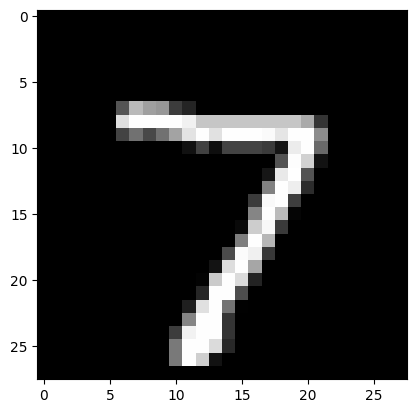

In [ ]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[0]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim = 1, keepdim = True).item()

print(f'Prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image, cmap = 'gray')
plt.show()